In [1]:
# -*- coding: utf-8 -*-
import os
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils import np_utils, plot_model
from keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd


# Mnist Dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
x_train = X_train.reshape(60000, 1, 28, 28)/255
x_test = X_test.reshape(10000, 1, 28, 28)/255
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

# Model Structure
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, input_shape=(1, 28, 28), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2, data_format='channels_first'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
print(model.summary())

# Train
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1)
# Test
loss, accuracy = model.evaluate(x_test, y_test)
print('Test:')
print('Loss: %s\nAccuracy: %s' % (loss, accuracy))

# Save model
model.save('./CNN_Mnist.h5')

# Load Model
model = load_model('./CNN_Mnist.h5')


# Display
def plot_img(n):
    plt.imshow(X_test[n], cmap='gray')
    plt.show()


def all_img_predict(model):
    print(model.summary())
    loss, accuracy = model.evaluate(x_test, y_test)
    print('Loss:', loss)
    print('Accuracy:', accuracy)
    predict = model.predict_classes(x_test)
    print(pd.crosstab(Y_test.reshape(-1), predict, rownames=['Label'], colnames=['predict']))


def one_img_predict(model, n):
    predict = model.predict_classes(x_test)
    print('Prediction:', predict[n])
    print('Answer:', Y_test[n])
    plot_img(n)

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 28, 32)         8096      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 14, 16)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 224)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               57600     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 68,266
Trainable params: 68,266
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
60000/60000 [==============================] - 13s 217us/step - loss: 0.3198 - acc: 0.9076
Epoch 2/10
60000/60000 [=======

In [2]:
all_img_predict(model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 28, 32)         8096      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 14, 16)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 224)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               57600     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 68,266
Trainable params: 68,266
Non-trainable params: 0
_________________________________________________________________
None
10000/10000 [==============================] - 2s 151us/step
Loss: 0.045186822447550366
Accuracy: 0.9869
predict    0     1     2    

Prediction: 1
Answer: 1


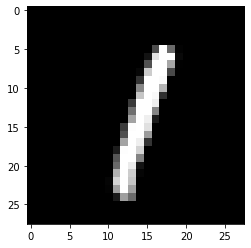

In [3]:
one_img_predict(model,5)

Prediction: 9
Answer: 9


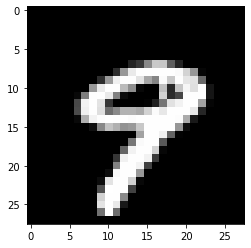

In [4]:
one_img_predict(model,9)